# <a href="https://mipt-stats.gitlab.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 4. Вероятность. 


**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds22_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb`.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*

**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 35 баллов за контест и 5 баллов за ноутбук
* Задача 2 &mdash; 20 баллов

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 3 &mdash; 40 баллов

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', font_scale=1.3, palette='Set2')
%matplotlib inline

### <font color="blue"><i>Легкая часть</i></font>


### Задача 1.

Условие задачи в контесте, ссылка на который отправлена через бот.

Продублируйте сюда написанный код и постройте требуемые графики.

In [186]:

import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sps

coin = sps.bernoulli(p=0.5).rvs
uniform_pdf = sps.uniform.pdf
norm_pdf = sps.norm.pdf
expon_pdf = sps.expon.pdf


def uniform(size=1, precision=30):
    data_size = np.append(size,precision)
    data = coin(data_size)
    divide = np.full(precision, 2).cumprod()
    return (data / divide).sum(axis = -1)

def plot_uniform_density(size=200):
    data = uniform(size)
    zeros = np.zeros(size)
    plt.figure()
    plt.hist(
        data, 
        density=True, 
        bins=10, 
        alpha=0.4, 
    )
    plt.scatter(
        data, 
        zeros, 
        alpha=0.4, 
        label='values'
    )
    dots = np.linspace(-0.25, 1.25, 500)
    plt.plot(
        np.linspace(-0.25, 1.25, 500),
        uniform_pdf(dots), 
        label='density'
    )
    plt.legend()
    plt.title("Гистограмма сл. величин и плотность")


def plot_uniform_different_precision(size=100):
    plt.figure(figsize = (15,3))
    for i, precision in enumerate([1, 2, 3, 5, 10, 30]):
        plt.subplot(3, 2, i + 1)
        plt.scatter(
            uniform(size,precision), 
            np.zeros(size), 
            alpha = 0.4
        )
        plt.yticks([])
        if i < 4: plt.xticks([])
        plt.suptitle("Изменение сл. величин в зависимости от точности")


def normal(size=1, loc=0, scale=1, precision=30):
    result = (np.sin(2 * np.pi * uniform(size, precision)) * np.sqrt(-2 * np.log(uniform(size, precision)))) * scale + loc
    return result


def plot_normal_density(size=200):
    data = normal(size, 0, 1, 30)
    zeros = np.zeros(size)
    plt.figure()
    plt.hist(
        data, 
        density=True, 
        bins=10, 
        alpha=0.4, 
    )
    plt.scatter(
        data, 
        zeros, 
        alpha=0.4, 
        label='values'
    )
    dots = np.linspace(-3, 3, 500)
    plt.plot(
        dots,
        norm_pdf(dots), 
        label='density'
    )
    plt.legend()
    plt.title("Плотность и распределение сл. величин")


def expon(size=1, lambd=1, precision=30):
    return (-1) * np.log(uniform(size, precision)) / lambd


def plot_expon_density(size=100):
    data = expon(size,1, 30)
    zeros = np.zeros(size)
    plt.figure()
    plt.hist(
        data, 
        density=True, 
        bins=10, 
        alpha=0.4, 
    )
    plt.scatter(
        data, 
        zeros, 
        alpha=0.4, 
        label='values'
    )
    dots = np.linspace(-0.5, 5., 500)
    plt.plot(
        dots,
        expon_pdf(dots), 
        label='density'
    )
    plt.legend()
    plt.title("Плотность и распределение сл. величин")

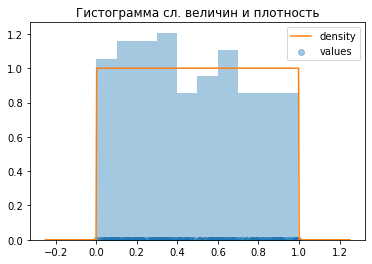

In [187]:
plot_uniform_density()

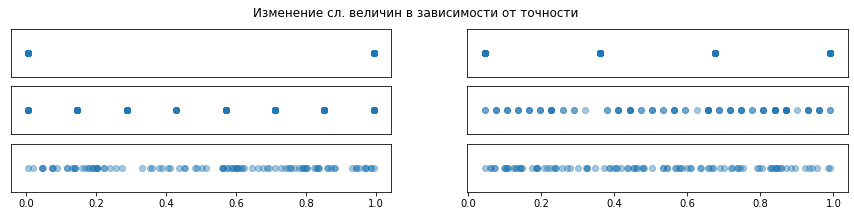

In [188]:
plot_uniform_different_precision()

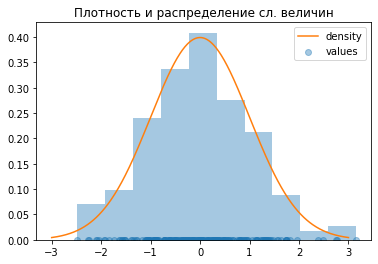

In [189]:
plot_normal_density()

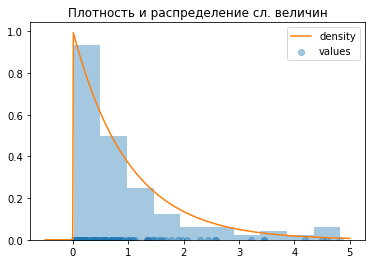

In [190]:
plot_expon_density()

**Выводы:**По равномерноему распределению можно построить нормальное и экпоненциальное. Также, чем больше параментр precision, тем больше значений принимает случайная величина.

...

---

### Задача 2.

Рассмотрим распределение Коши с плотностью
$$p(x) = \frac{1}{\pi(1+x^2)}$$
для $x\in\mathbb{R}$, которое известно своими тяжелыми хвостами. Иначе говоря, плотность убывает медленно при $x \to \infty$. Сравните, например, с нормальным или экспоненциальным распределениями. В частности, из-за этого у распределения Коши даже не существует математического ожидания.

За распределение Коши отвечает класс <a target="_black" href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.cauchy.html">`scipy.stats.cauchy`</a>.

**1.** Визуализируйте на одном графики плотности нормального распределения и распределения Коши. Что можно сказать?

In [50]:
import scipy.stats as sps
import matplotlib.pyplot as plt
import numpy as np

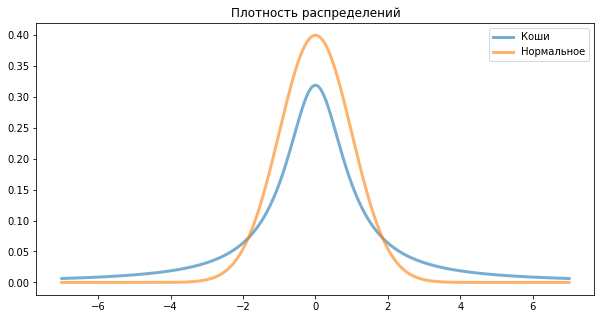

In [48]:
plt.figure(figsize=(10,5))
grid = np.linspace(-7, 7, 500)
plt.plot(grid, sps.cauchy.pdf(grid),
         lw=3, alpha=0.6, label='Коши')
plt.plot(grid, sps.norm.pdf(grid),
         lw=3, alpha=0.6, label='Нормальное')
plt.legend()
plt.title("Плотность распределений")
plt.show()

Видно, что при  $x \to \infty$ плотность распределения Коши убывает медленнее, чем плотность нормального распределения

**2.** Повторите эксперимент с <a href="https://mipt-stats.gitlab.io/courses/ad_fivt/lec4_LLN.html">занятия</a> про закон больших чисел для распределения Коши. Выполняется ли закон? 

In [52]:
size = 1000  # количество случайных величин
samples = sps.cauchy().rvs(size=size)
cum_means = samples.cumsum() / (np.arange(size) + 1)

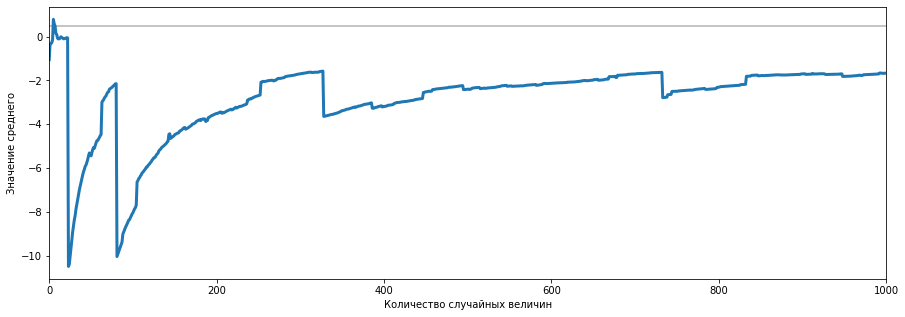

In [53]:
plt.figure(figsize=(15, 5))
plt.plot(cum_means, lw=3)
plt.hlines(0.5, 0, size, alpha=0.3)
plt.xlabel('Количество случайных величин')
plt.ylabel('Значение среднего')
plt.xlim((0, size));

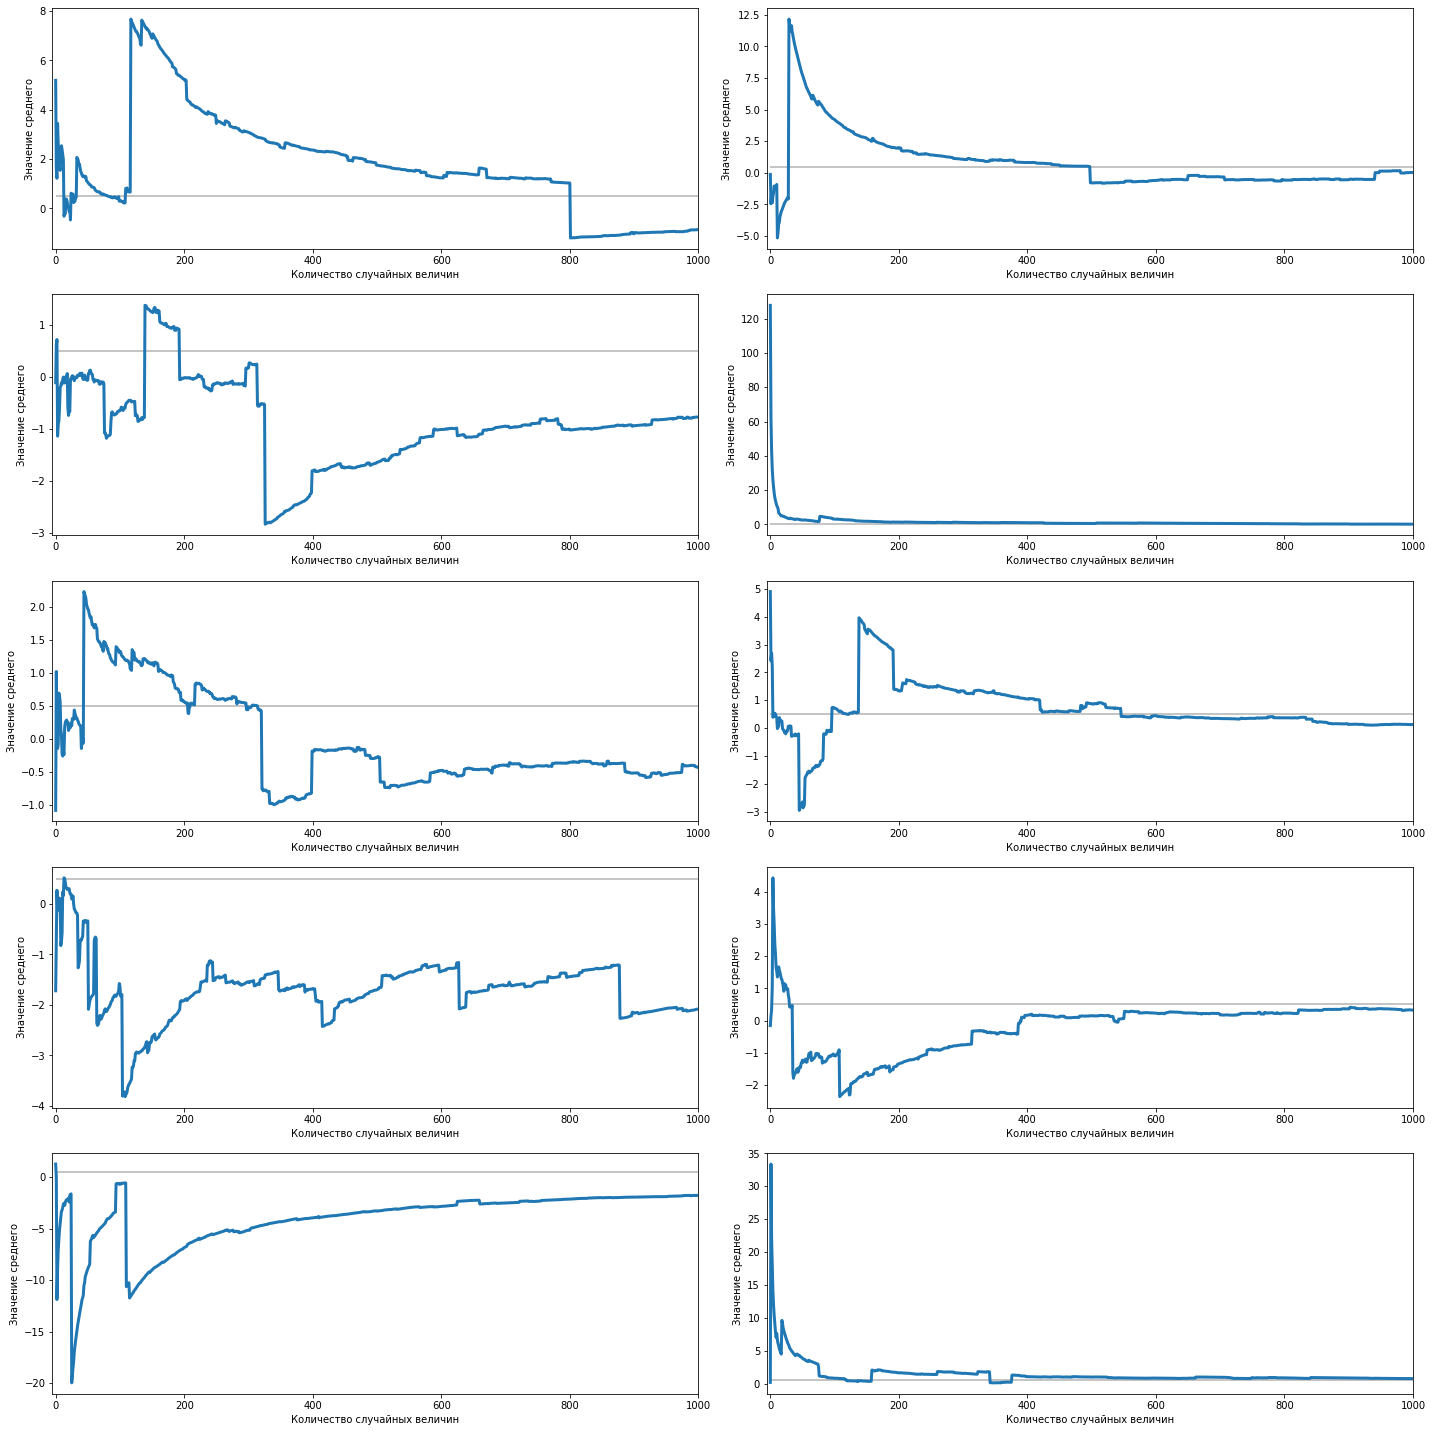

In [56]:
plt.figure(figsize=(20, 20))

# эксперименты
for i in range(10):

    # Генерация выборки и вычисление средних
    samples = sps.cauchy(loc=0, scale=1).rvs(size=size)
    cum_means = samples.cumsum() / (np.arange(size) + 1)
    
    # График
    plt.subplot(5, 2, i+1)
    plt.plot(cum_means, lw=3)
    plt.hlines(0.5, 0, size, alpha=0.3)
    plt.xlabel('Количество случайных величин')
    plt.ylabel('Значение среднего')
    plt.xlim((-5, size))
    
plt.tight_layout()

In [142]:
size = 200000  # количество случайных величин
samples_count = 500  # количество выборок

samples = sps.cauchy(loc=0, scale=1).rvs(size=(samples_count, size))
cum_means = samples.cumsum(axis=1) / (np.arange(size) + 1)

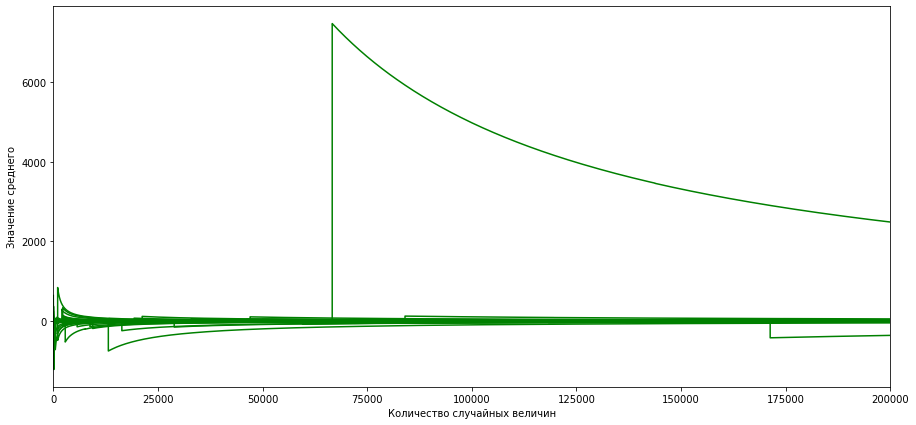

In [83]:
plt.figure(figsize=(15, 7))

# рисуем для каждой выборки отдельно
for i in range(samples_count):
    plt.plot(np.arange(size) + 1, cum_means[i], color='green')

plt.xlabel('Количество случайных величин')
plt.ylabel('Значение среднего')
plt.xlim((0, size));

Как видно из эксперимента, закон больших чисел для распределения Коши не выполняется

**3.** Аналогичным образом проведите эксперимент по изучению зависимости *выборочной* медианы от размера выборки. Медиану по выборке можно посчитать с помощью <a target="_blank" href="https://numpy.org/doc/stable/reference/generated/numpy.median.html">`np.median`</a>.

In [129]:
size = 1000  # количество случайных величин
samples = sps.cauchy(loc=0, scale=1).rvs(size=size)
cum_median = np.empty(size)
for i in range(1, size+ 1):
  cum_median[i - 1] = np.median(samples[0:i])

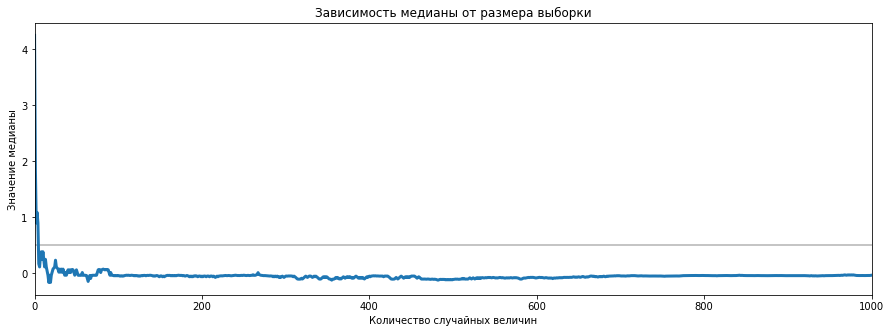

In [179]:
plt.figure(figsize=(15, 5))
plt.plot(cum_median, lw=3)
plt.hlines(0.5, 0, size, alpha=0.3)
plt.xlabel('Количество случайных величин')
plt.ylabel('Значение медианы')
plt.title("Зависимость медианы от размера выборки")
plt.xlim((0, size));

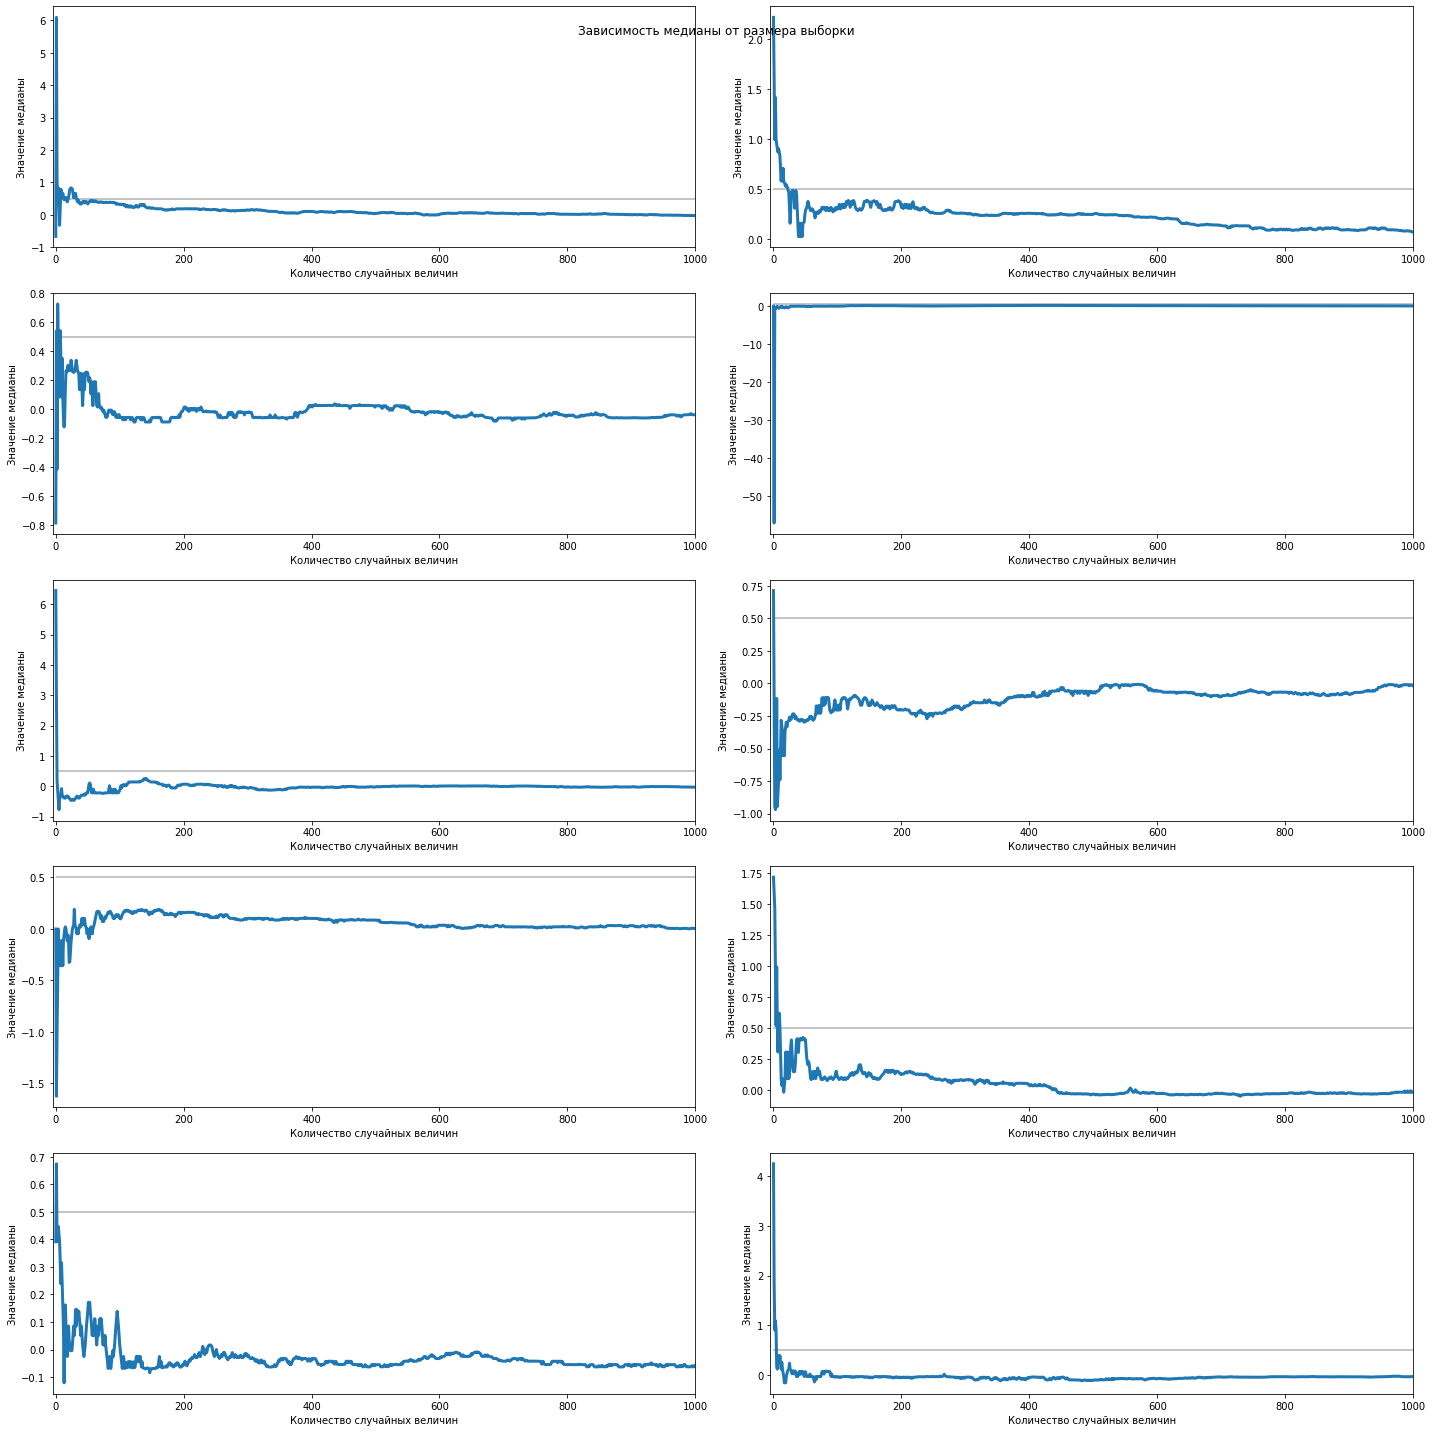

In [178]:
plt.figure(figsize=(20, 20))

# эксперименты
for i in range(10):

    # Генерация выборки и вычисление медианы
    samples = sps.cauchy(loc=0, scale=1).rvs(size=size)
    cum_median = np.empty(size)
    for j in range(1, size + 1):
      cum_median[j - 1] = np.median(samples[0:j])
    
    # График
    plt.subplot(5, 2, i+1)
    plt.plot(cum_median, lw=3)
    plt.hlines(0.5, 0, size, alpha=0.3)
    plt.xlabel('Количество случайных величин')
    plt.ylabel('Значение медианы')
    plt.xlim((-5, size))
    plt.suptitle("Зависимость медианы от размера выборки")
    
plt.tight_layout()

In [169]:
size = 1000  # количество случайных величин
samples_count = 500  # количество выборок

samples = sps.cauchy(loc=0, scale=1).rvs(size=(samples_count, size))
cum_median = np.empty((samples_count, size))
for i in range(samples_count):
  for j in range(1, size + 1):
    cum_median[i][j - 1] = np.median(samples[i][0:j])

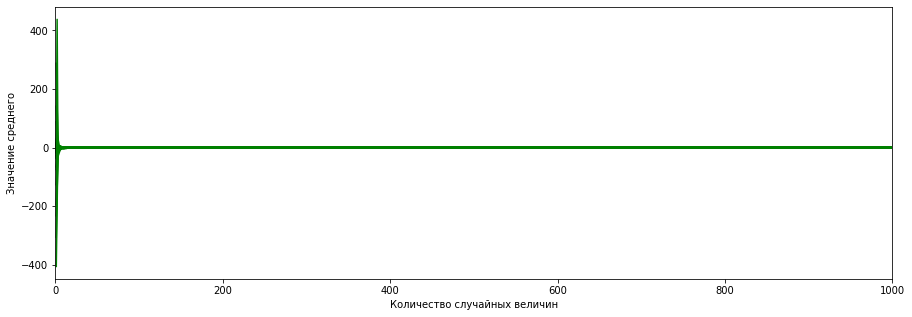

In [175]:
plt.figure(figsize=(15, 5))

# рисуем для каждой выборки отдельно
for i in range(samples_count):
    plt.plot(np.arange(size) + 1, cum_median[i], color='green')

plt.xlabel('Количество случайных величин')
plt.ylabel('Значение среднего')
plt.xlim((0, size));

**Вывод:** Экспиремент показал, что при достаточно большой выборке, значение медианы стреминтся к константе

...

### <font color="orange"><i>Сложная часть</i></font>

### Задача 3.

Перед выполнением этой задачи настоятельно рекомендуется посмотреть <a href="https://mipt-stats.gitlab.io/courses/ad_fivt/lec4_LLN.html">ноутбук</a> с лекции про закон больших чисел.

На практике не редко возникает вопрос &mdash; **сколько времени потребуется на сбор данных, чтобы оценить среднее с достаточной точностью**. Для ответа на этот вопрос можно использовать различные теоретические оценки, в частности, неравенство Чебышева.

Другой способ &mdash; смоделировать большое количество выборок.
Возьмем в качестве меры отклонения от среднего *среднее значение модуля отклонения от среднего*, то есть
$$F(n) = \frac{1}{K}\sum\limits_{j=1}^{K} \left| S_{nj} - a \right|,$$
где $a$ &mdash; математическое ожидание элемента выборки, $S_{nj}$ &mdash; *выборочное* среднее $n$ элементов в $j$-й выборке, а $K$ &mdash; общее количество выборок.

**1.** Рассмотрим распределения $Bern(a)$ для $a=0.5$. Пусть для нас допустимо отклонение на 0.02, иначе говоря при *истинном* среднем 0.5 мы считаем достаточно точными значения *выборочного* среднего от 0.48 до 0.52. Тогда в качестве *приближения* необходимого размера выборок можно взять наименьшее значение $n$, при котором $F(n) \leqslant 0.02$.

Реализуйте данный эксперимен для $K=500$  и найдите значение $n$. Визуализируйте зависимость $F(n)$ от $n$ в обычном и логарифмическом масштабах.

Для реализации без циклов стоит генерировать достаточно большие выборки и использовать функцию `np.where`.

**2.** Повторите данный эксперимент для значений $a$ от 0.05 до 0.95 с шагом 0.05. Визуализируйте зависимость необходимого размера выборки $n$ от значения $a$.

При реализации можно сделать цикл по значениям $a$.

**Выводы:**

...